# **DATASET**: Integration pour Classifier

Pour créer un classificateur, nous avons complété notre ensemble de données par un ensemble supplémentaire de phrases anglaises aléatoires, ce qui permet à notre modèle de disposer de connaissances lui permettant de déterminer si l'invite provient de Trump, de Shakespeare ou d'une autre source.

### Importation des **librairies** et des variables nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Création d'ensembles de données

In [2]:
df_path = r'C:\Users\marco\OneDrive\Desktop\TXTgeneration\train-00000-of-00001.parquet'
df_path_original = r'C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Balanced_dataset.csv'

In [3]:
other_df = pd.read_parquet(df_path)

In [4]:
other_df['Author'] = 'Other'

In [5]:
other_df = other_df.rename(columns={'english' : 'Text'})

In [6]:
other_df = other_df.drop(columns=['non_english'])

In [7]:
other_df

,Text,Author
0,"$10,000 Gold?",Other
1,SAN FRANCISCO – It has never been easy to have...,Other
2,"Lately, with gold prices up more than 300% ove...",Other
3,"Just last December, fellow economists Martin F...",Other
4,Wouldn’t you know it?,Other
...,...,...
214966,"Orphans, whose number has increased sharply ov...",Other
214967,"Having lost their homes and parents, they slee...",Other
214968,Grandparents are often unable or unwilling to ...,Other
214969,"Simply put, children in Iraq have been reduced...",Other


### Intégration de l'ensemble de données supplémentaires

In [8]:
df = pd.read_csv(df_path_original)

In [9]:
df = pd.concat([df, other_df], axis=0, ignore_index=True)

In [10]:
df

,Author,Text
0,Trump,Today we express our deepest gratitude to all ...
1,Trump,Busy day planned in New York. Will soon be mak...
2,Trump,Love the fact that the small groups of protest...
3,Trump,Just had a very open and successful presidenti...
4,Trump,A fantastic day in D.C. Met with President Oba...
...,...,...
245045,Other,"Orphans, whose number has increased sharply ov..."
245046,Other,"Having lost their homes and parents, they slee..."
245047,Other,Grandparents are often unable or unwilling to ...
245048,Other,"Simply put, children in Iraq have been reduced..."


## **DATASET**: exploration et équilibrage

L'ajout d'une colonne "Other" nécessite de l'équilibrer avec l'ensemble de données original ; pour ce faire, je calcule la moyenne des jetons pour chaque texte correspondant et je la réaligne en pourcentages en éliminant des textes au fur et à mesure.

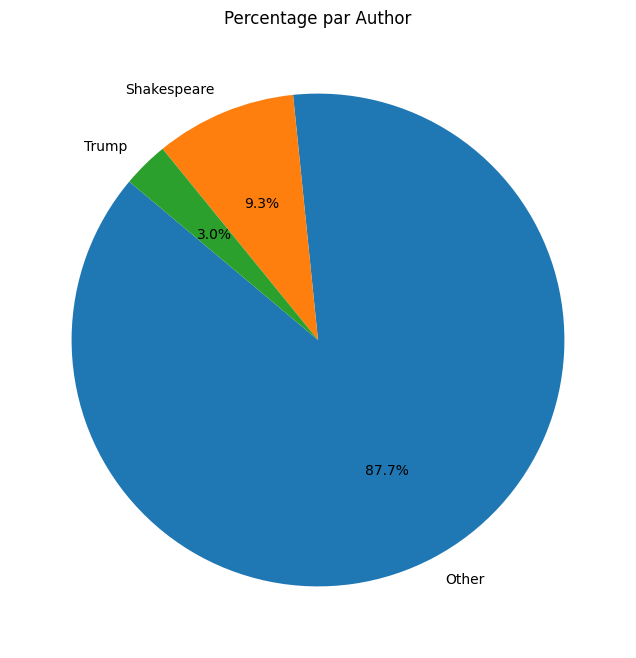

In [11]:
author_counts = df['Author'].value_counts()
author_percentages = author_counts / author_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(author_percentages, labels=author_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage par Author')
plt.show()


In [12]:
def count_tokens(text):
    return len(text.split())

# Appliquer la fonction à la colonne "Text" pour obtenir le nombre de tokens pour chaque texte
df['num_tokens'] = df['Text'].apply(count_tokens)

# Grouper par auteur et calculer la moyenne du nombre de tokens
average_tokens_per_author = df.groupby('Author')['num_tokens'].mean().reset_index()

print(average_tokens_per_author)
print(author_percentages)

        Author  num_tokens
0        Other   21.655930
1  Shakespeare    7.430412
2        Trump   66.897436
Author
Other          87.725362
Shakespeare     9.250765
Trump           3.023873
Name: count, dtype: float64


In [23]:
# Dados iniciaux
num_texts = {
    'Other': 214971,
    'Shakespeare': 22669,
    'Trump': 7410
}

avg_token_count = {
    'Other': 21.655930,
    'Shakespeare': 7.430412,
    'Trump': 66.897436
}

total_tokens = {
    author: num_texts[author] * avg_token_count[author]
    for author in num_texts
}

# Calculer la différence de tokens entre Other et Shakespeare/Trump
diff_tokens_shakespeare = total_tokens['Other'] - total_tokens['Shakespeare']
diff_tokens_trump = total_tokens['Other'] - total_tokens['Trump']

# Calculer le pourcentage de textes Other à supprimer pour obtenir un nombre de tokens similaire à Shakespeare et Trump
percent_to_remove_shakespeare = (diff_tokens_shakespeare / avg_token_count['Other']) / num_texts['Other'] * 100
percent_to_remove_trump = (diff_tokens_trump / avg_token_count['Other']) / num_texts['Other'] * 100

print(f"Pourcentage de textes 'Other' à supprimer pour obtenir un nombre de tokens équivalent à 'Shakespeare': {percent_to_remove_shakespeare:.2f}%")
print(f"Pourcentage de textes 'Other' à supprimer pour obtenir un nombre de tokens équivalent à 'Trump': {percent_to_remove_trump:.2f}%")


Pourcentage de textes 'Other' à supprimer pour obtenir un nombre de tokens équivalent à 'Shakespeare': 96.38%
Pourcentage de textes 'Other' à supprimer pour obtenir un nombre de tokens équivalent à 'Trump': 89.35%


In [24]:
import random  # Importer le module random

# Nombre de lignes à supprimer pour 'Other'
num_to_remove = 198000

# Sélectionner aléatoirement les lignes à supprimer
rows_to_remove = df[df['Author'] == 'Other'].sample(n=num_to_remove).index

# Supprimer les lignes du DataFrame
df_balanced = df.drop(rows_to_remove)

# Vérifier l'équilibre
print("Nombre de lignes par auteur dans le DataFrame équilibré :")
print(df_balanced['Author'].value_counts())


Nombre de lignes par auteur dans le DataFrame équilibré :
Author
Shakespeare    22669
Other          16971
Trump           7410
Name: count, dtype: int64


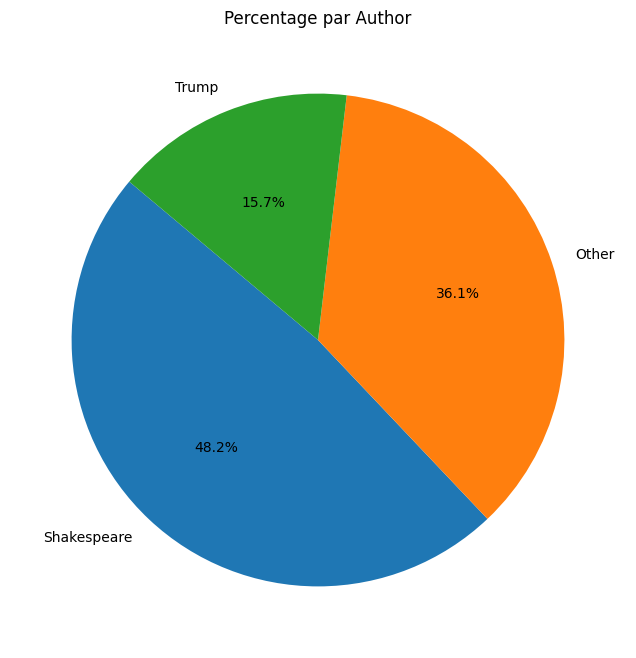

In [14]:
author_counts = df_balanced['Author'].value_counts()
author_percentages = author_counts / author_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(author_percentages, labels=author_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage par Author')
plt.show()


In [16]:
df_balanced = df_balanced.drop(columns=['num_tokens'])

Sauvegarde du jeu de données

In [20]:
df_balanced.to_csv('Integrated_Dataset_for_classification.csv', index=False)

## **Dataset**: Train_Test_Split

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
dataset_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Integrated_Dataset_for_classification.csv"
folder_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Divided_Dataset"

In [29]:
# Lire le dataset à partir du fichier CSV
df = pd.read_csv(dataset_path)

# Séparons les caractéristiques de la cible
X = df.drop(columns='Author')
y = df['Author']

# Première division : 85% pour train+validation et 15% pour test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Deuxième division : 85% obtenu est divisé en 70% pour train et 15% pour validation (15/85 = 0.1765)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Créer les DataFrame pour chaque ensemble
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Sauvegarder les fichiers CSV aux emplacements respectifs
train_path = os.path.join(folder_path, 'I_train.csv')
val_path = os.path.join(folder_path, 'I_validation.csv')
test_path = os.path.join(folder_path, 'I_test.csv')

train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)